# Introduction to Bayes Models

### Data Science 350
### Stephen Elston

## Introduction

Modern Baysian models are in the class of compuationally intensive models. Bayesian models are a rich class of models, which can provide attractive alternatives to frequentist models. 

![**A Baysian would win this bet**](img/Sun.png)
**A Baysian would win this bet**

## Brief history

A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published postumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supporter of Isac Newton's new theory of calculus, with his publication, &An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

![](img/ThomasBayes.gif)

A version of Bayes Theorem which in its modern form was published by Pierre-Simon Laplace in Essai philosophique sur les probabilités 1814. Laplace applied Baysian methods to problems in celestial mechanics. These problems had great practical implicatons in the late 18th and early 19th centuries for the safe navigaton of ships. 
 
![](img/Laplace.jpg)

The geophysicist and mathemtician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's methods using p-values.

![](img/JeffreysProbability.jpg)

The battle between Fisher, Jefferys and their protégés continued for most of the 20th century. This battle was bitter and often personal. The core of the argument was:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a confidence interval was subjective in any event.

Dispite these philosophical squables, Baysian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. A number of success during the Second World War, with the philosophical battles raging, included:

- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistian Kolmagorov used Bayes methods to greatly improve artillery accuracy. 
- Bayesian models used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improved the ability to locate U-boats using directional data from intercepted radio transmissions. 


Starting in the second half of the 20th century the convergance of greater computing power and general acceptance lead to the following notable advances in computational Baysian methods.

- Statistical sampling using Monte Carlo methods; stanislaw ulam, John von Neuman; 1946, 1947
- MCMC - Metropolis et al. (1953) Journal of Chemical Physics
- Hastings (1970) ; Monte Carlo sampling methods using Markov chains and their application
- Geman and Geman (1984) Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images
- Duane, Kennedy, Pendleton, and Roweth (1987)  Hamiltonian MCMC
- Gelfand and Smith (1990) Sampling-based approaches to calculating marginal densities.



## Baysian vs. Frequentist Views

With greater compuational power and general acceptance, Bayes methods are now widely used in areas ranging from medical research to natural language understanding to web search. Amoung pragmatists, the common belief today is that some problems are better handled by Frequentist methods and some with Bayesian methods.

Let's summarize the differences between the Baysian and Frequentist views. 

- Bayesian methods use priors to quantify what we know about parameters.
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the unknowns about parameters.

Recalling that both views are useful, we can contrast these methods with a chart.

![](img/FrequentistBayes.jpg)

## Bayes Theorm

Let's go through a simple derivation of Baye's theorm. Remember the rule for conditional probability:

$$P(A|B) = \frac{P(A \cap B}{p(B)}\\
And\\
P(B|A) = \frac{P(A \cap B)}{p(A)}$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A) \\
Or\\
P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

Which is Bayes' Theorm!

### Example, medical test

Let's work out the conditional probabilities for a medical test which has an accurcy of 99% for a very rare disease with a probability of occurance of 0.0003125. We can work out the contitonal probability tree as shown below.

![](img/Medical.jpg)

Let's apply Bayes Theorm to this problem. What we want to know is the chance someone actually has the disease given a positve test.

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)} \\
P(Disease|Test+) = P(Test+|Disease) \frac{P(Disease)}{P(Test+)}$$

**Your Turn:** Compute the conditional probability of having the disease given a positive test. Hint, the probability of a positive test is the sum of the probability of a positive test given the disease and the probability of an erronious test given no disease. 

In [24]:
.99 * 0.0003125 /(.99 * 0.0003125 + .01 * (1 - 0.0003125))

[1] 0.03001819

### Example, probabilities of eye and hair color

A sample population has the following probabilities of eye and hair color combinations.

In [9]:
eyeHair = data.frame(Black = c(0.11, 0.03, 0.03, 0.01), 
                     Brunette = c(0.2, 0.14, 0.09, 0.05),
                     Red = c(0.04, 0.03, 0.02, 0.02),
                     Blond = c(0.01, 0.16, 0.02, 0.03))
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green')
eyeHair

,Black,Brunette,Red,Blond
Brown,0.11,0.20,0.04,0.01
Blue,0.03,0.14,0.03,0.16
Hazel,0.03,0.09,0.02,0.02
Green,0.01,0.05,0.02,0.03


The figure in the table above are the conditmional probabilities. Note that in the case $P(hair|eye) = P(eye|hair)$. 

Given these probabilities joint probabilities, it is easy to compute the marginal probabilities by summing the probabilities in the rows and columns. THe **Marginal probability** is the probability of along one variable (one margin) of the distribution. For example, $P(Red)$ or $P(Green)$.

In [10]:
## Compute the marginal distribution of hair color and eye color
eyeHair = rbind(eyeHair, apply(eyeHair, 2, sum))
eyeHair$Marginal_eye = apply(eyeHair, 1, sum)
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green', 'Marginal_hair')
eyeHair

,Black,Brunette,Red,Blond,Marginal_eye
Brown,0.11,0.20,0.04,0.01,0.36
Blue,0.03,0.14,0.03,0.16,0.36
Hazel,0.03,0.09,0.02,0.02,0.16
Green,0.01,0.05,0.02,0.03,0.11
Marginal_hair,0.18,0.48,0.11,0.22,0.99


**Your Turn:** Use Bayes Theorm to compute the probability of each eye color given that the subject has blue eyes; $P(Hair\ Color|Blue\ Eyes)$. Hint, this is a bit tricky since $P(hair\ color) = 1$ across all colors. 

In [20]:
temp = eyeHair['Blue',] / eyeHair['Blue', 'Marginal_eye']
temp

,Black,Brunette,Red,Blond,Marginal_eye
Blue,0.08333333,0.3888889,0.08333333,0.4444444,1


## Applying Bayes Theorm

We need a formulation of Bayes Theorm which is convienient to use for compuational problems. Specifically, we don't want to be stuck summing all of the possiblilites to compute $P(B)$. 

Look at some fun facts about conditional probabilities. 

$$
𝑃(𝐵 \cap A) = 𝑃(𝐵│𝐴)𝑃(𝐴) \\
And \\
𝑃(𝐵)=𝑃(𝐵 \cap 𝐴)+𝑃(𝐵 \cap \bar{𝐴}) \\
Then \\
𝑃(𝐵)=𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴}) \\
where \\
\bar{A} = Not\ A
$$

We can now rewrite Bayes Theorm:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

This is a bit of a mess. But fortunately, we don't always need the denominator, in which case we are just look at the un-normalized distribution:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalizaton constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplifed relationship Bayes Theorm

How to we interpret the relationships shown above? We do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠│𝑑𝑎𝑡𝑎) \propto 𝑃(𝑑𝑎𝑡𝑎|𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠) $$

These relationships apply to data distributions or to parameters in a model (partial slopes, intercept, error distributions, lasso constant,…) and the observed data. 

### Creating Bayes models

Given prior assumption about the behavior of the parameters (the prior), produce a model which tells us the probability of observing our data, to compute new probability of our parameters. Given this, the steps for working with a 

- Identify data relevant to the research question. E.g.: what are the measurement scales of the data?
- Define a descriptive model for the data. For example, pick a linear model formula.
- Specify a prior distribution of the parameters. For example, we think the error in the linear model is Normally distributed as $N(\Theta,\sigma^2)$.
- Use the Bayesian inference formula (above) to re-assess parameter probabilities.
- Update if more data is observed. This is key. Baysian models natural update as more data is added, a form of learning.


### How do we choose a prior

The choice of the prior is a serious problem when performing Bayesian analysis.In general, a prior must be convincing to a **sceptical audience**. Some possible approches include:

- Prior observations
- Domain knowledge
- If poor knowledge use less informative prior
- **Watch out:** A uniform prior is informative. For exampe, you must set the limits on range of values
 
One analytically and compuationally simple choice is a **conjugate prior**. When a likelihood is multiplied by a conjugate prior the distribution of the postirior is the same as the likelihood. Most named distributions have conjugates. A few commonly used eamples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gama



NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL


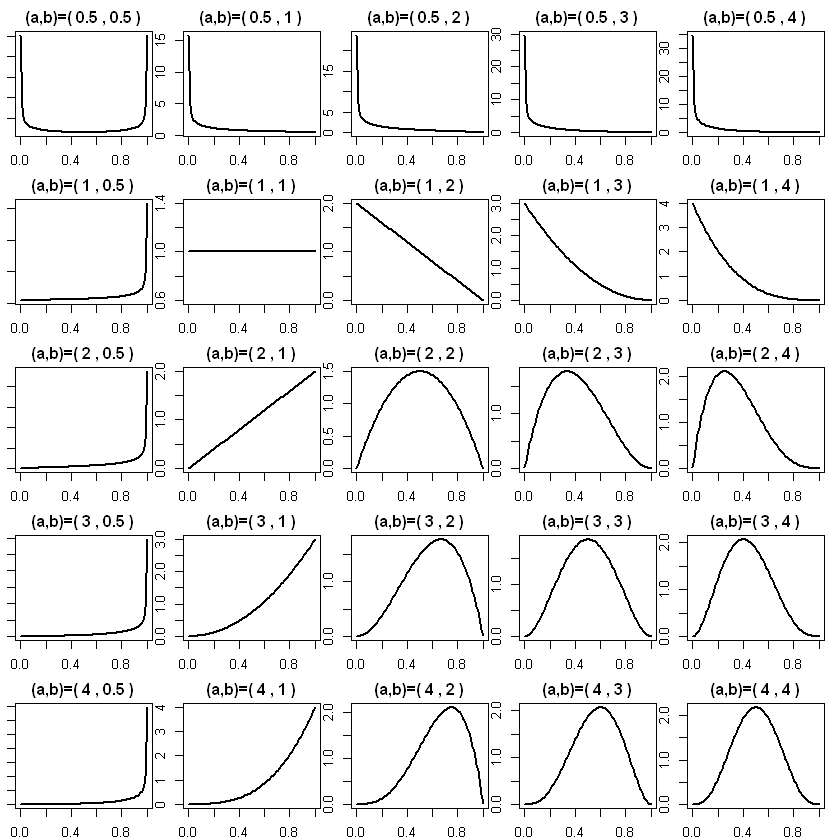

In [25]:
alpha = c(0.5,1,2,3,4)
beta = alpha
x = seq(0.001,0.999,length=100)

par(mfrow = c(5,5), mar=c(2,1,2,1)) # mar = c(bottom, left, top, right)
sapply(alpha, function(a){
  sapply(beta, function(b){
    plot_title = paste("(a,b)=(",a,",",b,")")
    plot(x,dbeta(x,a,b),xlab="",ylab="",
         main=plot_title, type="l", lwd=2)
  })
})

# Set plot options back to normal
par(mar=c(5.1,4.1,4.1,2.1), mfrow=c(1,1))

In [26]:
library(LearnBayes)
## I think the chance of rain is 0.2 with
## with a probability at the 75% point of 0.28
## Compute my Beta prior
beta.par <- beta.select(list(p=0.5, x=0.2), list(p=0.75, x=.28))
beta.par ## The parameters of my Beta distribution

Warning message:
"package 'LearnBayes' was built under R version 3.3.2"
Attaching package: 'LearnBayes'

The following object is masked from 'package:dplyr':

    regroup



[1]  2.95 10.82

[1]  8.95 14.82

[1] 14.95 18.82

[1] 26.95 26.82

[1] 38.95 34.82

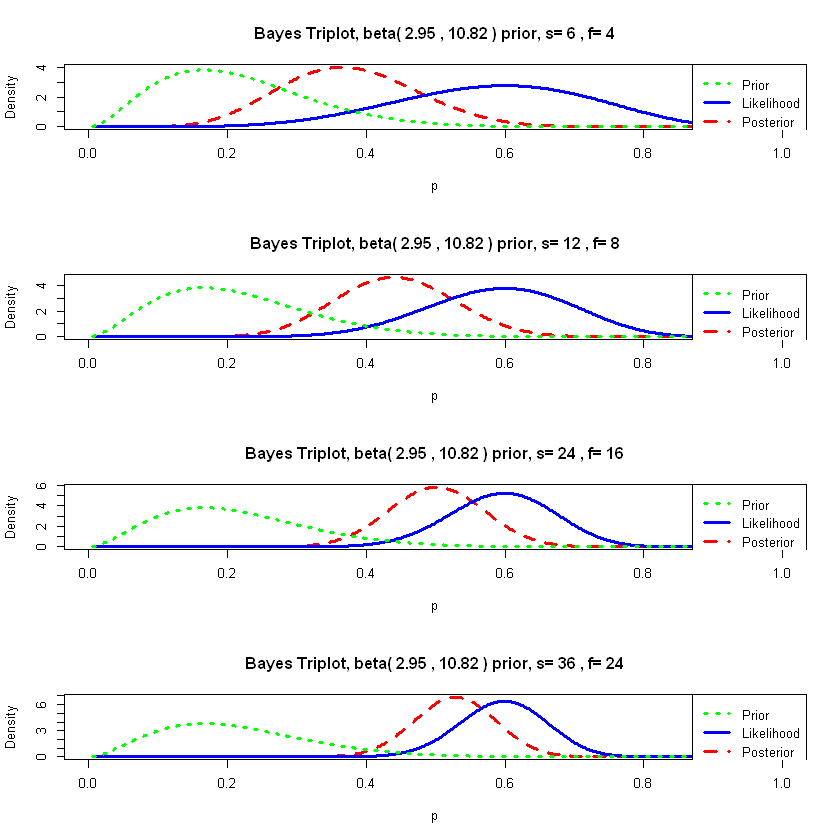

In [29]:
par(mfrow = c(4,1))
beta.par + c(6, 4)
triplot(beta.par, c(6, 4))
beta.par + c(6 + 6, 4 + 4)
triplot(beta.par, c(6 + 6, 4 + 4))
beta.par + c(6 + 6 + 12, 4 + 4 + 8)
triplot(beta.par, c(6 + 6 + 12, 4 + 4 + 8))
beta.par + c(6 + 6 + 12 + 12, 4 + 4 + 8 +8)
triplot(beta.par, c(6 + 6 + 12 + 12, 4 + 4 + 8 + 8))
par(mfrow = c(1,1))

5%       95% 
0.4348226 0.6234643

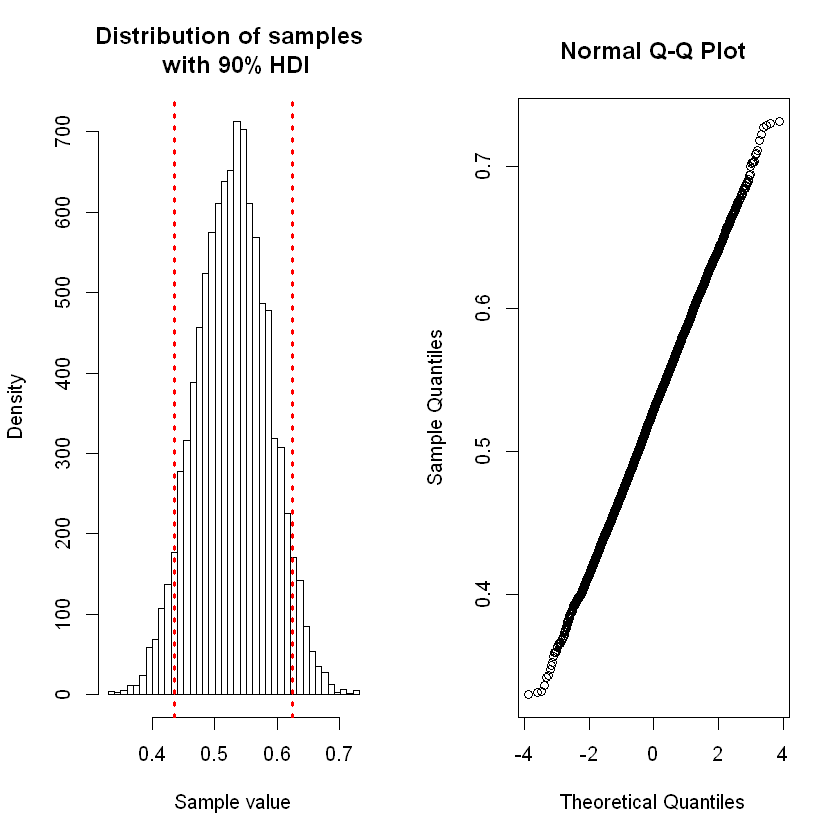

In [30]:
# Simulate from the posterior and 
## compute confidence intervals
beta.post.par <- beta.par + c(6 + 6 + 12 + 12, 4 + 4 + 8 + 8)
post.sample <- rbeta(10000, beta.post.par[1], beta.post.par[2])
par(mfrow = c(1,2))
quants = quantile(post.sample, c(0.05, 0.95))
breaks = seq(min(post.sample), max(post.sample), length.out = 41)
hist(post.sample, breaks = breaks, 
     main = 'Distribution of samples \n with 90% HDI',
     xlab = 'Sample value',
     ylab = 'Density')
abline(v = quants[1], lty = 3, col = 'red', lwd = 3)
abline(v = quants[2], lty = 3, col = 'red', lwd = 3)
qqnorm(post.sample)
par(mfrow = c(1,1))
quants

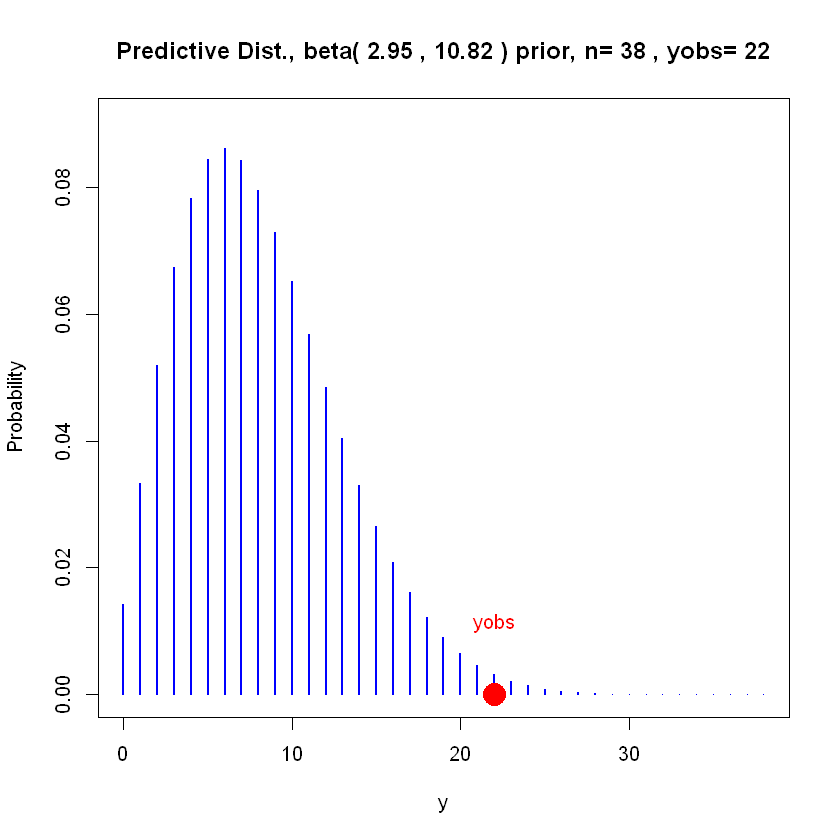

In [31]:
## Check on the model
predplot(beta.par, 6 + 8 + 12 + 12, 4 + 2 + 8 + 8)

$prob
[1] 0.9142243

$set
 [1]  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

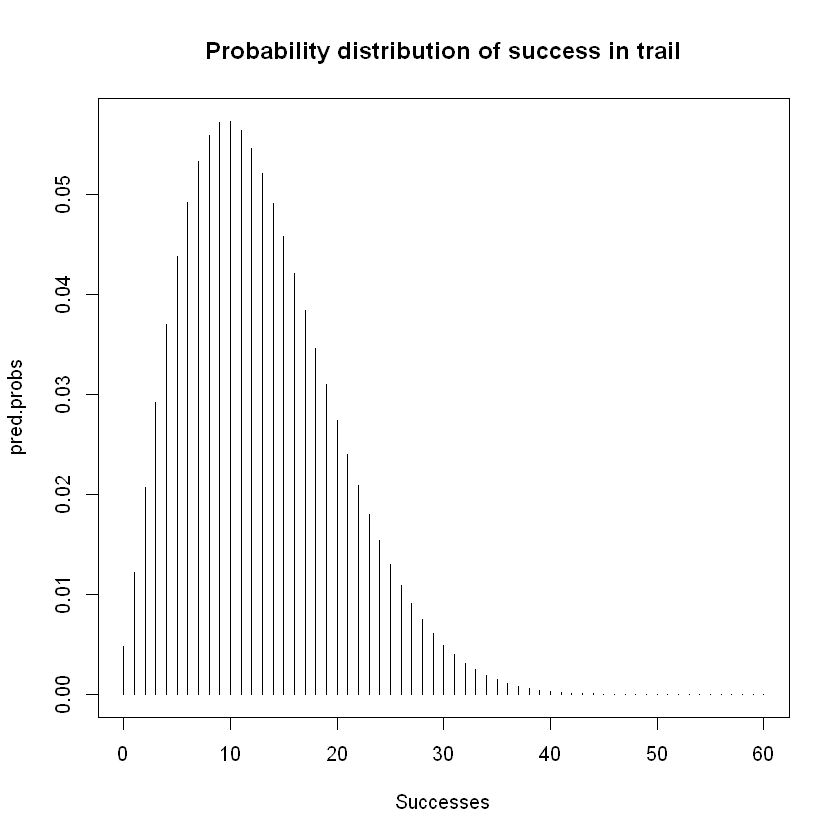

In [32]:
## What is the probability of observing 0-8 successes in the
## next 60 trials?
n <- 60
s <- 0:n
pred.probs <- pbetap(beta.par, n, s)
plot(s, pred.probs, type="h", 
     main = 'Probability distribution of success in trail',
     xlab = 'Successes')
discint(cbind(s, pred.probs), 0.90)

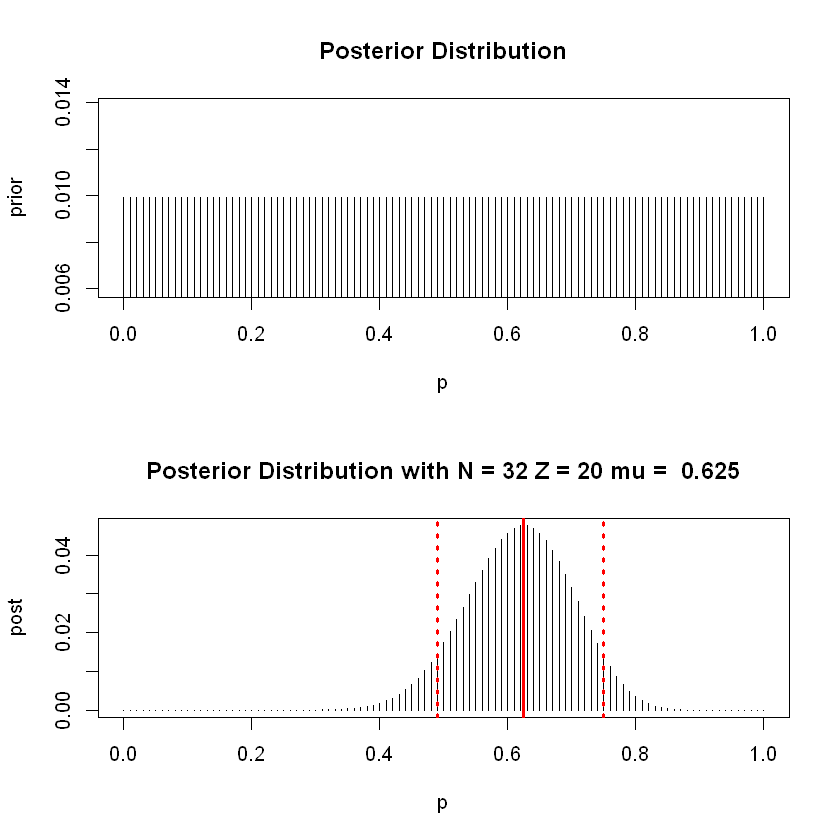

In [34]:
##--- Discrete priors ------ 
#
# Create a uniform prior
p <- seq(0, 1, by = 0.01)
prior <- 1 / 101 + 0 * p

## With 20 successes and 12 failures find posterior
library(LearnBayes)
tries = c(20, 12)
post <- pdisc(p, prior, tries)
HCI = discint(cbind(p, post), 0.90) # 90 percent HCI

## Plot the prior and posterior
par(mfrow = c(2,1))
plot(p, prior, type="h",main="Posterior Distribution")
Main = paste("Posterior Distribution with N =",
             as.character(sum(tries)), 'Z =',
             as.character(tries[1]),
             'mu = ',
             as.character(tries[1]/sum(tries)))
plot(p, post, type="h",main=Main)
abline(v = HCI$set[1], lty = 3, col = 'red', lwd = 3)
abline(v = HCI$set[length(HCI$set)], , lty = 3, col = 'red', lwd = 3)
abline(v = tries[1]/sum(tries), col = 'red', lwd = 3)
par(mfrow = c(1,1))

In [35]:
## Print the 90 percent HCI 
HCI

$prob
[1] 0.9001245

$set
 [1] 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60 0.61 0.62 0.63
[16] 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75

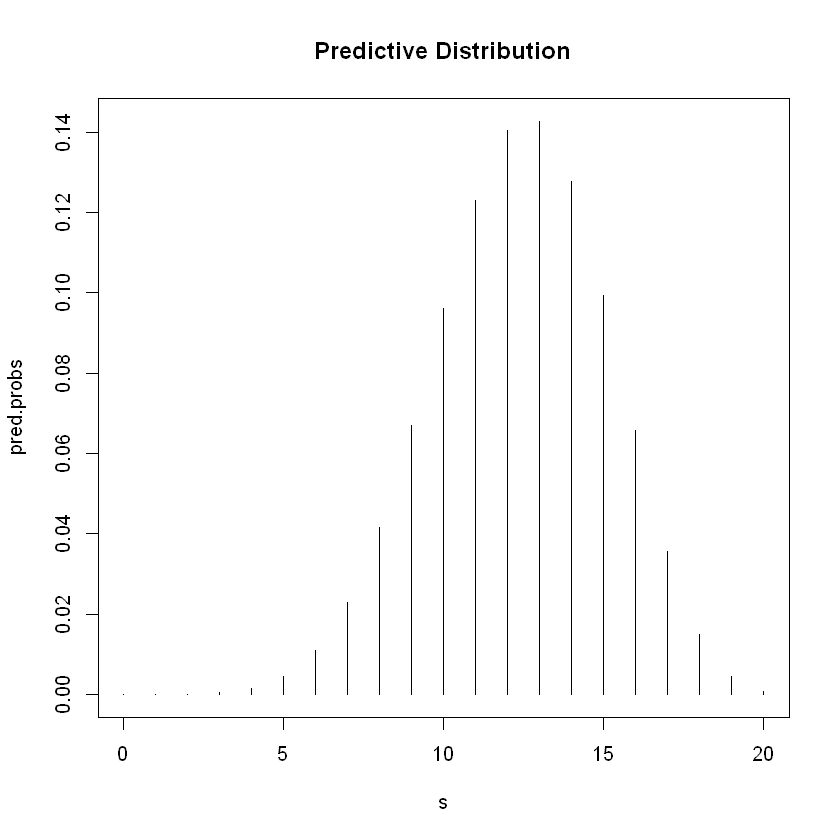

In [36]:
## Make a prediction for the distribution of the 
## next 20 observations
n <- 20
s <- 0:20
pred.probs <- pdiscp(p, post, n, s)
plot(s, pred.probs, type="h",
     main="Predictive Distribution")
